# Desenvolvendo um algorítmo de machine learning

In [1]:
#  importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- importando os dados dos delitos

In [2]:
delitos_ny = pd.read_csv('select_ny.csv')

In [3]:
delitos_ny.local_da_ocorrencia.value_counts()

dentro       432559
em_frente    189192
oposto        23389
atras         19406
Name: local_da_ocorrencia, dtype: int64

 - convertendo as colunas data para Datetime

In [4]:
delitos_ny['data_da_ocorrencia'] = pd.to_datetime(delitos_ny['data_da_ocorrencia'])

In [5]:
delitos_ny['data_final_da_ocorrencia'] = pd.to_datetime(delitos_ny['data_final_da_ocorrencia'])

In [6]:
delitos_ny['data_comunicacao_policia'] = pd.to_datetime(delitos_ny['data_comunicacao_policia'])

 - pegando apenas os delitos concluídos

In [7]:
delitos_ny = delitos_ny.query('conclusao == "concluido"')

 - importando os dados da população de 2010-2030

In [8]:
populacao = pd.read_csv('populacao_2010-2020.csv')

In [9]:
populacao

,Age Group,Borough,2010,2010 - Boro share of NYC total,2020,2020 - Boro share of NYC total,2030,2030 - Boro share of NYC total
0,Total Population,NYC Total,"8,242,624",100%,"8,550,971",100%,"8,821,027",100%
1,Total Population,Bronx,"1,385,108",16.8%,"1,446,788",16.92%,"1,518,998",17.22%
2,Total Population,Brooklyn,"2,552,911",30.97%,"2,648,452",30.97%,"2,754,009",31.22%
3,Total Population,Manhattan,"1,585,873",19.24%,"1,638,281",19.16%,"1,676,720",19.01%
4,Total Population,Queens,"2,250,002",27.3%,"2,330,295",27.25%,"2,373,551",26.91%
5,Total Population,Staten Island,"468,730",5.69%,"487,155",5.7%,"497,749",5.64%


 ## Definindo as variáveis, agrupando por categorias e em valores numéricos
 
 
  - nivel de ofensa(contravenção, crime, violação)
  - bairro
  - local da ocorrencia
  - delitos com maiores ocorrencias
  - delitos mais graves

### 1-  Nivel de ofensa
  
  - contravenção
  - crime
  - violação

In [10]:
nivel_de_ofensa = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.nivel_de_ofensa ).reset_index()

In [11]:
nivel_de_ofensa.head()

nivel_de_ofensa,data_da_ocorrencia,contravencao,crime,violacao
0,2013-01-01,46,76,6
1,2013-01-02,7,7,3
2,2013-01-03,3,5,1
3,2013-01-04,3,5,3
4,2013-01-05,4,2,2


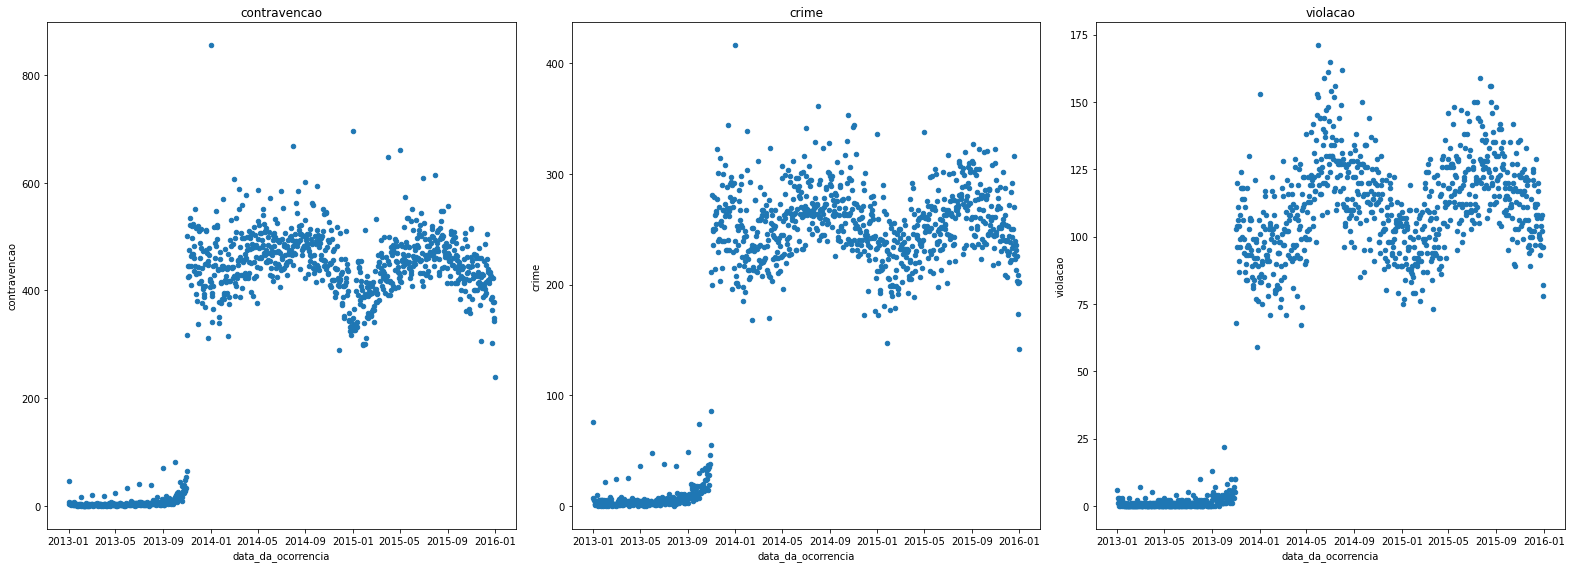

In [12]:
fig, ax = plt.subplots(1,3,figsize=(22,8))
nivel_de_ofensa.plot(x='data_da_ocorrencia',y='contravencao',kind='scatter',ax=ax[0],title='contravencao');
nivel_de_ofensa.plot(x='data_da_ocorrencia',y='crime',kind='scatter',ax=ax[1],title='crime');
nivel_de_ofensa.plot(x='data_da_ocorrencia',y='violacao',kind='scatter',ax=ax[2],title='violacao');
plt.tight_layout();

In [13]:
nivel_de_ofensa_geral = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.nivel_de_ofensa )

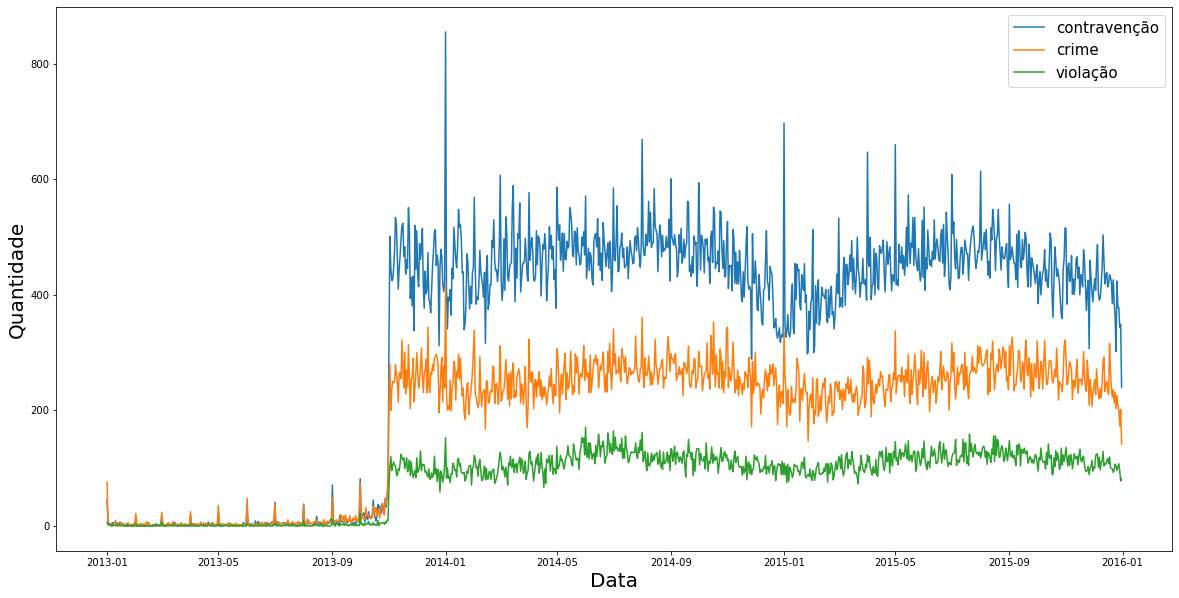

In [14]:
plt.figure(figsize=(20,10))
plt.plot(nivel_de_ofensa_geral)
plt.xlabel('Data', fontsize=20)
plt.ylabel('Quantidade', fontsize=20)
legenda = ['contravenção','crime', 'violação']
plt.legend(legenda, fontsize=15)
plt.show()

 ### 2- Bairro

In [15]:
qtde_ocorrencia_dia = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.bairro)

In [16]:
qtde_ocorrencia_dia.head()

bairro,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
data_da_ocorrencia,,,,,
2013-01-01,24,44,26,30,4
2013-01-02,3,5,6,2,1
2013-01-03,1,3,3,1,1
2013-01-04,2,2,4,2,1
2013-01-05,2,1,2,2,1


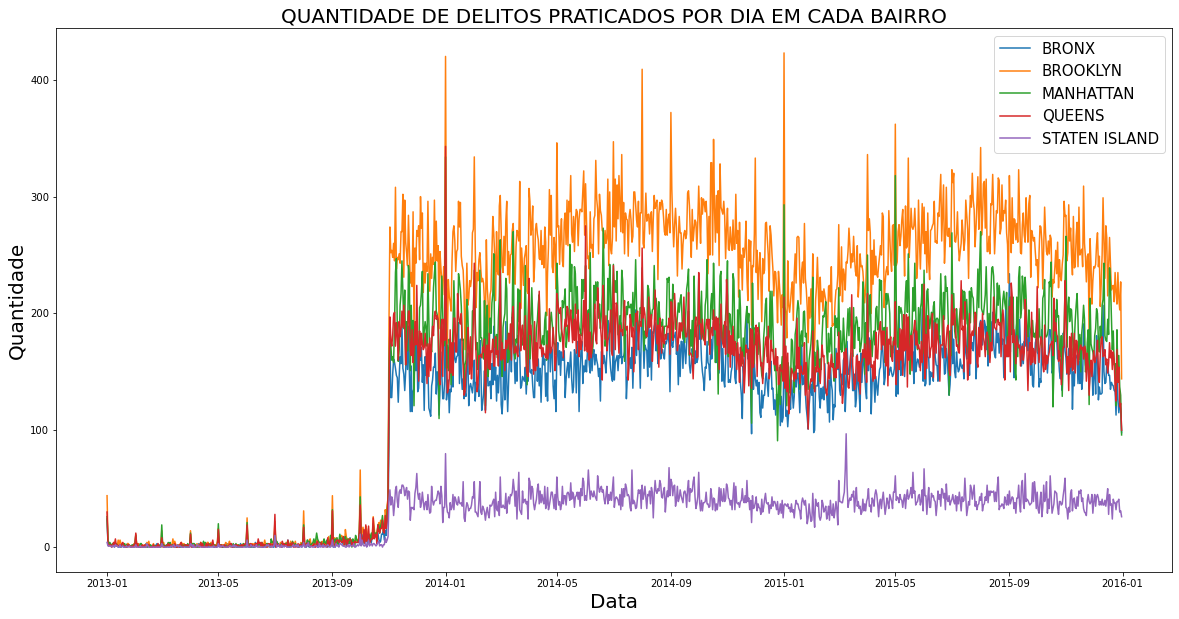

In [17]:
plt.figure(figsize=(20,10))
plt.plot(qtde_ocorrencia_dia)
plt.xlabel('Data', fontsize=20)
plt.ylabel('Quantidade', fontsize=20)
legenda = ['BRONX','BROOKLYN', 'MANHATTAN','QUEENS','STATEN ISLAND']
plt.legend(legenda, fontsize=15)
plt.title('QUANTIDADE DE DELITOS PRATICADOS POR DIA EM CADA BAIRRO', fontsize=20)
plt.show()

### 3-  Local da ocorrencia

In [18]:
local_da_ocorrencia = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.local_da_ocorrencia).reset_index()

In [19]:
local_da_ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   data_da_ocorrencia  1094 non-null   datetime64[ns]
 1   atras               1094 non-null   int64         
 2   dentro              1094 non-null   int64         
 3   em_frente           1094 non-null   int64         
 4   oposto              1094 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 42.9 KB


In [20]:
#  classificando os delitos como sendo dentro / fora  dos estabelecimentos


new_local_da_ocorrencia = {'atras': "fora", 'dentro': "dentro", 'em_frente': "fora", 
                           'oposto': "fora" }
delitos_ny['local_da_ocorrencia'] = delitos_ny['local_da_ocorrencia'].map(new_local_da_ocorrencia)

In [21]:
local_da_ocorrencia = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.local_da_ocorrencia).reset_index()
local_da_ocorrencia.head()

local_da_ocorrencia,data_da_ocorrencia,dentro,fora
0,2013-01-01,114,14
1,2013-01-02,15,2
2,2013-01-03,5,4
3,2013-01-04,10,1
4,2013-01-05,6,2


In [22]:
# sns.set_palette('Accent')
# sns.set_style('darkgrid')
# ax=sns.lineplot(x='data_da_ocorrencia', y='dentro', data = local_da_ocorrencia)
# ax.figure.set_size_inches(14,7)
# ax.set_title('Delitos praticados dentro dos estabelecimentos', loc='left', fontsize=18)
# ax.set_xlabel('Data dos delitos', fontsize=14)
# ax.set_ylabel('Quatidade de delitos', fontsize=14)
# ax=ax

### 4 -  Descrição da ofensa

 - criando um dataframe data x descrição dos delitos

In [23]:
descricao_da_ofensa = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.descricao_da_ofensa)

In [24]:
descricao_da_ofensa.head()

descricao_da_ofensa,ABORTION,ADMINISTRATIVE CODE,AGRICULTURE & MRKTS LAW-UNCLASSIFIED,ALCOHOLIC BEVERAGE CONTROL LAW,ANTICIPATORY OFFENSES,ARSON,ASSAULT 3 & RELATED OFFENSES,BURGLAR'S TOOLS,BURGLARY,CHILD ABANDONMENT/NON SUPPORT,...,PROSTITUTION & RELATED OFFENSES,RAPE,ROBBERY,SEX CRIMES,THEFT OF SERVICES,THEFT-FRAUD,UNAUTHORIZED USE OF A VEHICLE,UNDER THE INFLUENCE OF DRUGS,UNLAWFUL POSS. WEAP. ON SCHOOL,VEHICLE AND TRAFFIC LAWS
data_da_ocorrencia,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,0,0,0,0,0,2,0,1,0,...,0,8,0,24,0,25,1,0,0,0
2013-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2013-01-03,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2013-01-05,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


- separando os delitos em :
 - delitos com maiores ocorrencias
 - delitos mais graves

### 4.1 Tipos de delitos mais frequentes

In [25]:
delitos_ny.descricao_da_ofensa.value_counts().head()

PETIT LARCENY                     127645
HARRASSMENT 2                      87641
ASSAULT 3 & RELATED OFFENSES       73455
CRIMINAL MISCHIEF & RELATED OF     67013
GRAND LARCENY                      64629
Name: descricao_da_ofensa, dtype: int64

In [26]:
delitos_mais_frequentes = descricao_da_ofensa.loc[:,['PETIT LARCENY','HARRASSMENT 2', 'ASSAULT 3 & RELATED OFFENSES',
                                                     'CRIMINAL MISCHIEF & RELATED OF','GRAND LARCENY']]

In [27]:
delitos_mais_frequentes.head()

descricao_da_ofensa,PETIT LARCENY,HARRASSMENT 2,ASSAULT 3 & RELATED OFFENSES,CRIMINAL MISCHIEF & RELATED OF,GRAND LARCENY
data_da_ocorrencia,,,,,
2013-01-01,2,6,2,7,23
2013-01-02,4,3,0,0,5
2013-01-03,0,1,1,2,3
2013-01-04,1,3,0,2,2
2013-01-05,0,1,1,0,1


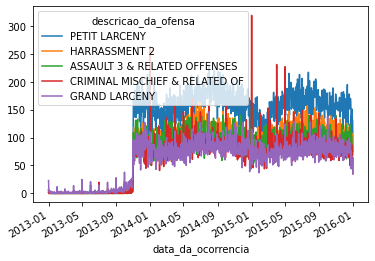

In [28]:
delitos_mais_frequentes.plot()

### 4.2 Delitos mais graves

In [29]:
# delitos_ny.descricao_da_ofensa.value_counts().head(40)

In [30]:
# 'HARRASSMENT 2','FELONY ASSAULT','DANGEROUS DRUGS','SEX CRIMES','DANGEROUS WEAPONS'

In [31]:
delitos_mais_graves = descricao_da_ofensa.loc[:,['HARRASSMENT 2','FELONY ASSAULT','DANGEROUS DRUGS',
                                                 'SEX CRIMES','DANGEROUS WEAPONS']]

In [32]:
delitos_mais_graves.columns = ['assedio','crime_de_assalto','drogas_perigosas','crimes_sexuais','armas_perigosas']

In [33]:
delitos_mais_graves.head()

,assedio,crime_de_assalto,drogas_perigosas,crimes_sexuais,armas_perigosas
data_da_ocorrencia,,,,,
2013-01-01,6,1,0,24,0
2013-01-02,3,0,0,0,0
2013-01-03,1,0,0,0,0
2013-01-04,3,0,0,1,0
2013-01-05,1,0,0,1,0


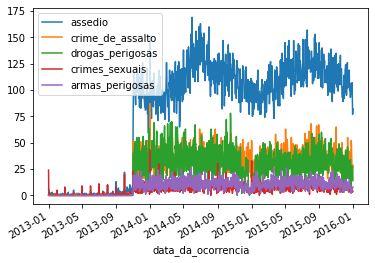

In [34]:
delitos_mais_graves.plot()

 - fazendo a decomposição sazonal

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [46]:
resultado = seasonal_decompose(delitos_mais_graves['assedio'], period=12)

 - obtendo os componentes

In [47]:
tendencia = resultado.trend
sazonalidade = resultado.seasonal
residuo = resultado.resid

Text(0.5, 1.0, 'Tendencia')

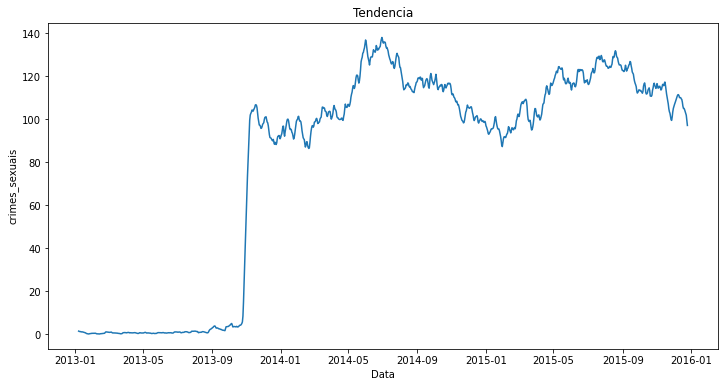

In [48]:
plt.figure(figsize=(12,6))
plt.plot(tendencia)
plt.xlabel('Data')
plt.ylabel('crimes_sexuais')
plt.title('Tendencia')

Text(0.5, 1.0, 'Sazonalidade')

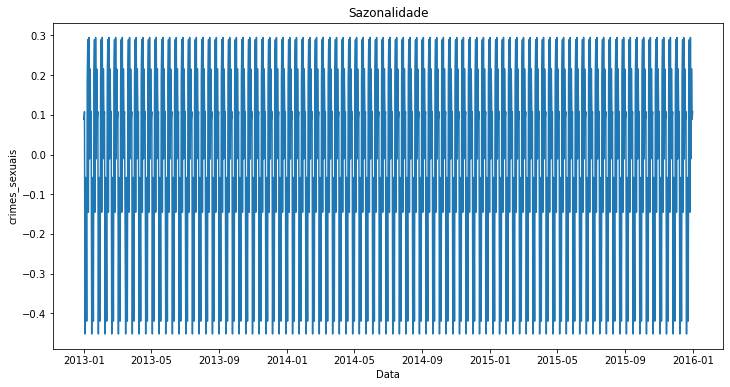

In [43]:
plt.figure(figsize=(12,6))
plt.plot(sazonalidade)
plt.xlabel('Data')
plt.ylabel('crimes_sexuais')
plt.title('Sazonalidade')

Text(0.5, 1.0, 'Resíduo')

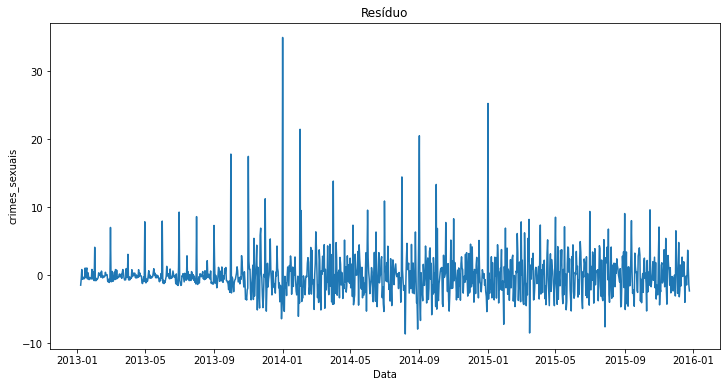

In [45]:
plt.figure(figsize=(12,6))
plt.plot(residuo)
plt.xlabel('Data')
plt.ylabel('crimes_sexuais')
plt.title('Resíduo')
